In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
fraud = pd.read_csv('Fraud_check.csv')

In [3]:
fraud.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Undergrad
0,Single,68833,50047,10,YES,NO
1,Divorced,33700,134075,18,YES,YES
2,Married,36925,160205,30,YES,NO
3,Single,50190,193264,15,YES,YES
4,Married,81002,27533,28,NO,NO


In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


(array([217.,   0.,   0.,   0.,   0., 189.,   0.,   0.,   0., 194.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

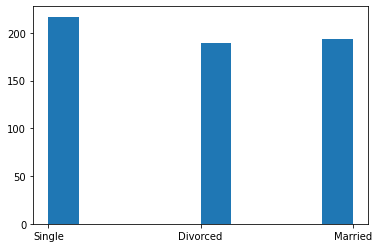

In [5]:
# Graphical Representation of data
import matplotlib.pyplot as plt
#Histogram
plt.hist(fraud['Marital.Status']) 

(array([302.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 298.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

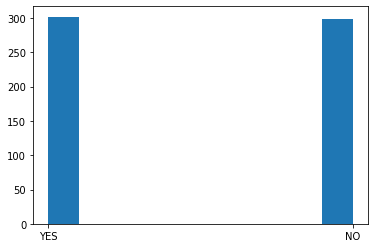

In [6]:
# Graphical Representation of data
import matplotlib.pyplot as plt
#Histogram
plt.hist(fraud['Urban']) 

Insights:
The no of people belong urban and non-urban are equal.

(array([288.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 312.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

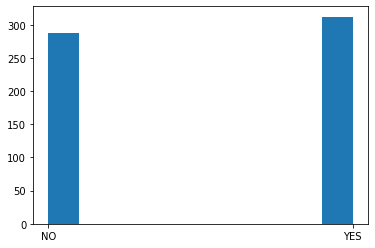

In [7]:
# Graphical Representation of data
import matplotlib.pyplot as plt
#Histogram
plt.hist(fraud['Undergrad']) 

Insights: The undergraduate people are slightly more than the graduate one.

<AxesSubplot:>

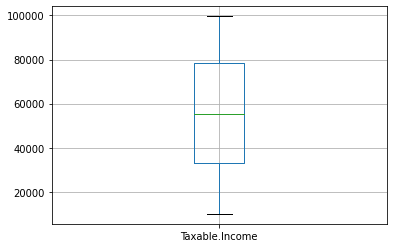

In [8]:
#Box plot
fraud.boxplot(column=['Taxable.Income'])

<AxesSubplot:>

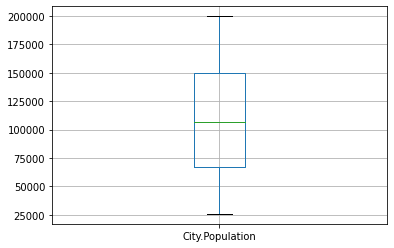

In [9]:
#Box plot
fraud.boxplot(column=['City.Population'])

<AxesSubplot:>

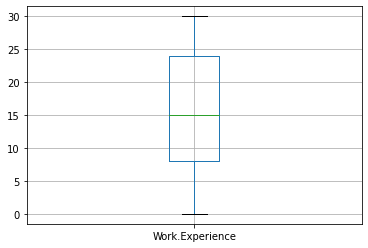

In [10]:
#Box plot
fraud.boxplot(column=['Work.Experience'])

Insights: There are no outliers present in the workexpierence,citypopulation, taxableincome.

In [11]:
fraud['Output'] = np.where(fraud['Taxable.Income']<=30000,'Risky','Good')
fraud.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Undergrad,Output
0,Single,68833,50047,10,YES,NO,Good
1,Divorced,33700,134075,18,YES,YES,Good
2,Married,36925,160205,30,YES,NO,Good
3,Single,50190,193264,15,YES,YES,Good
4,Married,81002,27533,28,NO,NO,Good


In [12]:
#Creating dummy variable for Weather column
fraud_1=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'])
label_encoder = preprocessing.LabelEncoder()
fraud_1['Output']= label_encoder.fit_transform(fraud_1['Output']) 

In [13]:
fraud_1.head()

,Taxable.Income,City.Population,Work.Experience,Output,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,0,1,0,0,0,1,0,1
1,33700,134075,18,0,0,1,1,0,0,0,1
2,36925,160205,30,0,1,0,0,1,0,0,1
3,50190,193264,15,0,0,1,0,0,1,0,1
4,81002,27533,28,0,1,0,0,1,0,1,0


In [14]:
column_names = ["Taxable.Income","City.Population","Work.Experience", "Undergrad_NO","Undergrad_YES","Marital.Status_Divorced","Marital.Status_Married","Marital.Status_Single","Urban_NO","Urban_YES","Output"]

In [15]:
fraud_2 = fraud_1.reindex(columns=column_names)

In [16]:
fraud_2.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Output
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0


In [17]:
fraud_2=fraud_2.drop('Taxable.Income',axis=1)

In [18]:
fraud_2.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Output
0,50047,10,1,0,0,0,1,0,1,0
1,134075,18,0,1,1,0,0,0,1,0
2,160205,30,1,0,0,1,0,0,1,0
3,193264,15,0,1,0,0,1,0,1,0
4,27533,28,1,0,0,1,0,1,0,0


In [19]:
fraud_2.shape

(600, 10)

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.StandardScaler()
import warnings
warnings.filterwarnings("ignore")
sig_num_col=['City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES']
fraud_2[sig_num_col] = scaler.fit_transform(fraud_2[sig_num_col])

In [21]:
x=fraud_2.iloc[:,:9]
y=fraud_2.iloc[:,9]

In [22]:
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,-1.178521,-0.629143,1.040833,-1.040833,-0.678125,-0.691254,1.328524,-0.993355,0.993355
1,0.508500,0.276370,-0.960769,0.960769,1.474654,-0.691254,-0.752715,-0.993355,0.993355
2,1.033109,1.634639,1.040833,-1.040833,-0.678125,1.446646,-0.752715,-0.993355,0.993355
3,1.696831,-0.063197,-0.960769,0.960769,-0.678125,-0.691254,1.328524,-0.993355,0.993355
4,-1.630532,1.408261,1.040833,-1.040833,-0.678125,1.446646,-0.752715,1.006689,-1.006689
...,...,...,...,...,...,...,...,...,...
595,-1.390432,-0.968710,-0.960769,0.960769,1.474654,-0.691254,-0.752715,-0.993355,0.993355
596,-1.071672,-1.534655,-0.960769,0.960769,1.474654,-0.691254,-0.752715,-0.993355,0.993355
597,0.909696,-1.761033,1.040833,-1.040833,1.474654,-0.691254,-0.752715,-0.993355,0.993355
598,1.432197,0.163181,-0.960769,0.960769,-0.678125,1.446646,-0.752715,1.006689,-1.006689


In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Output, Length: 600, dtype: int32

In [24]:
fraud_2['Output'].unique()

array([0, 1])

In [25]:
fraud_2.Output.value_counts()

0    476
1    124
Name: Output, dtype: int64

In [26]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [27]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

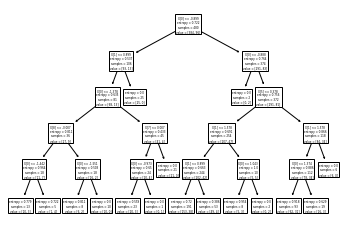

In [28]:
#PLot the decision tree
tree.plot_tree(model);

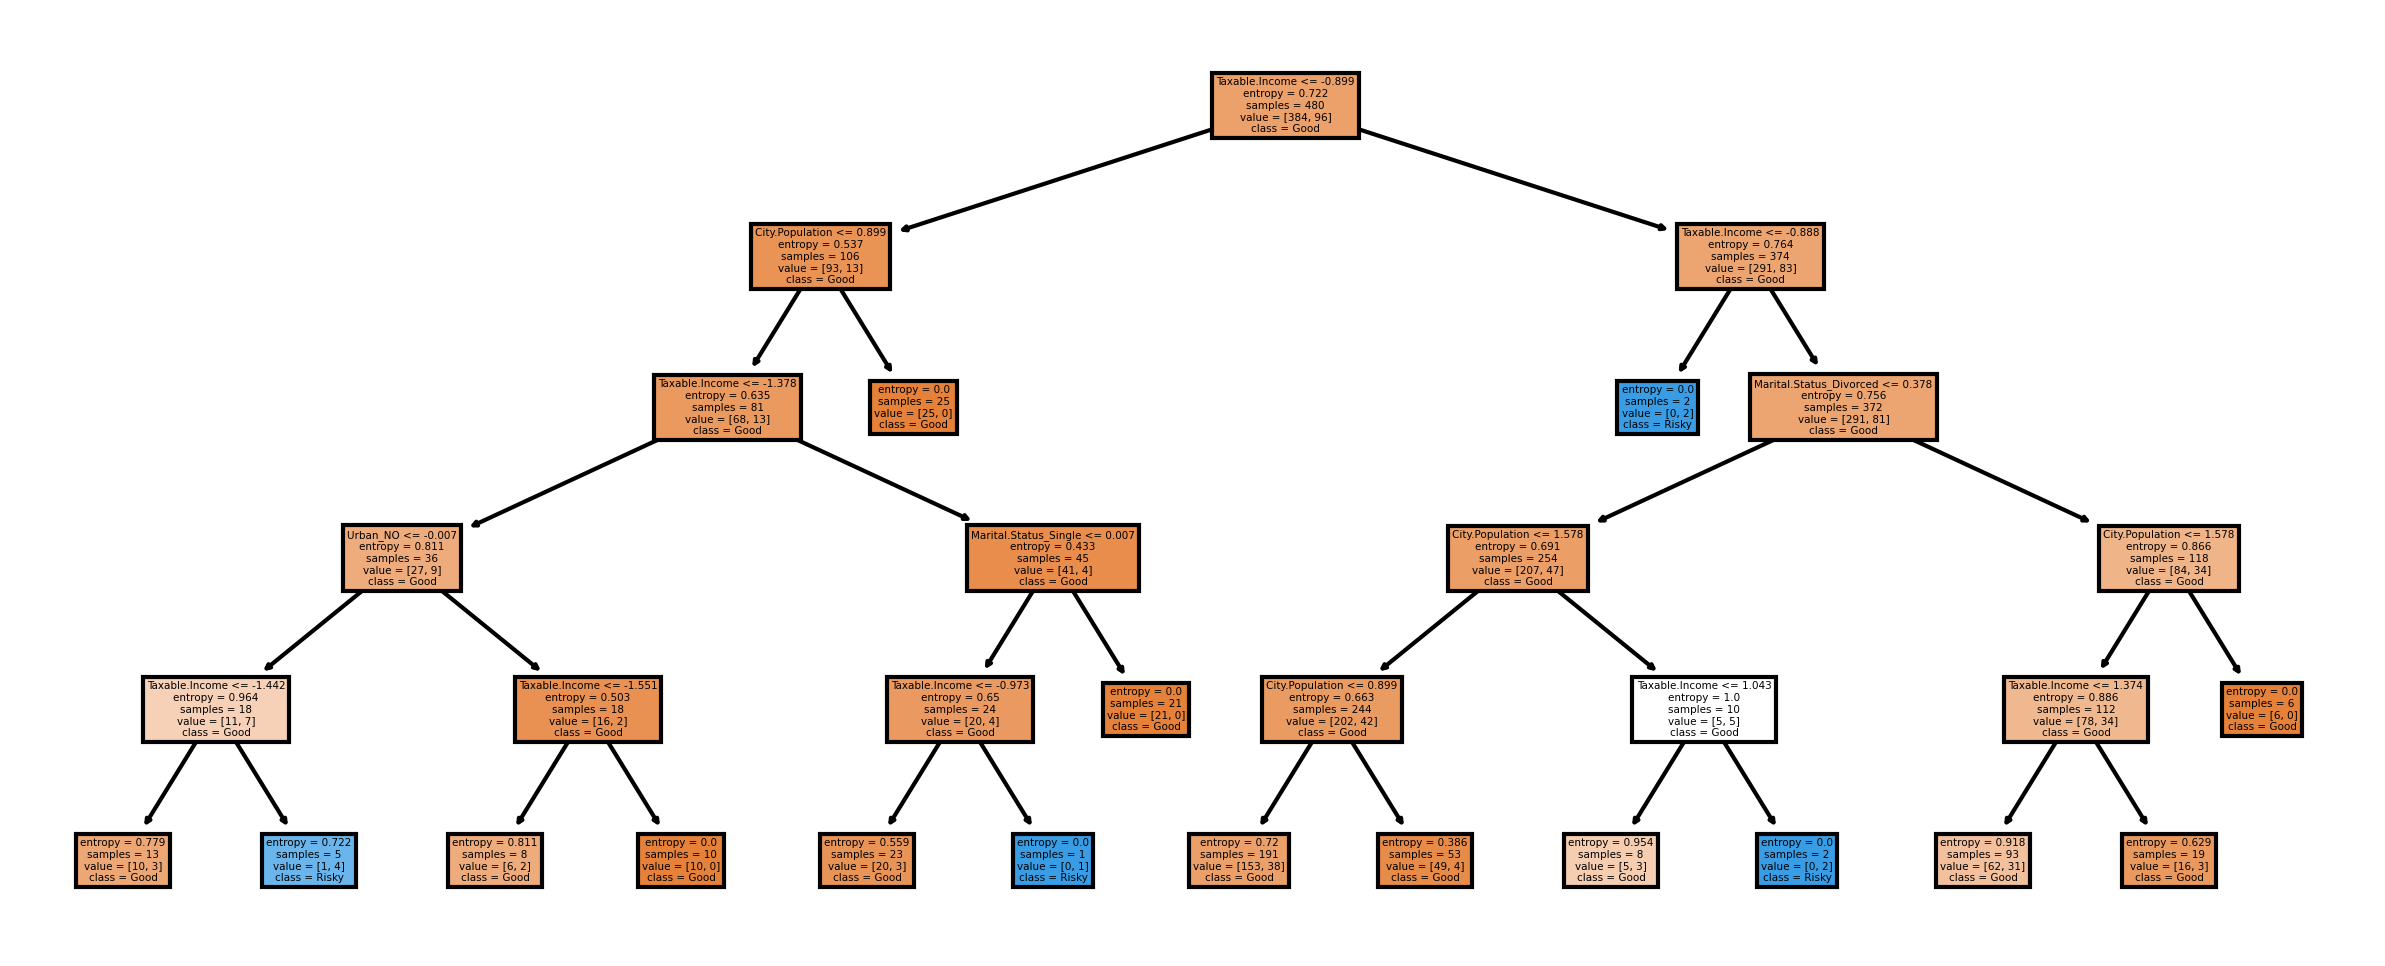

In [29]:
fn=['Taxable.Income','City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES','Output']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [30]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    117
1      3
dtype: int64

In [31]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Output,,
0,90,2
1,27,1


In [33]:
# Accuracy 
np.mean(preds==y_test)

0.7583333333333333

In [39]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7375


In [40]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
feature_scores = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

City.Population            0.522344
Work.Experience            0.348223
Marital.Status_Married     0.022110
Undergrad_YES              0.020076
Urban_YES                  0.019923
Undergrad_NO               0.019103
Urban_NO                   0.017386
Marital.Status_Divorced    0.015480
Marital.Status_Single      0.015354
dtype: float64

In [42]:
y_pred_100 = model.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 1000 decision-trees : 0.7250
